## Letterboxd Reviews: Most Popular Movie

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DayLocator, DateFormatter, date2num

This notebook makes use of some data I scraped from Letterboxd (movie, movie rating (0-10), date rated) for some brief data exploration.

In [2]:
results = pd.read_json(r"C:/Users/ia767/Documents/Coding/Letterboxd/FAILED_user_ratings.json")

In [3]:
results.head()

,date,movie,rating
0,"[2019-07-23T22:55:36Z, 2019-07-23T22:55:43Z, 2...","[/film/avengers-infinity-war/, /film/black-pan...","[focus, mob-hide, elongated, ir s hide-toggle-..."
1,"[2019-07-23T22:22:34Z, 2019-07-23T22:22:54Z, 2...","[/film/avengers-infinity-war/, /film/black-pan...","[focus, mob-hide, elongated, ir s hide-toggle-..."
2,"[2019-07-23T22:01:27Z, 2019-07-23T22:01:58Z, 2...","[/film/avengers-infinity-war/, /film/guardians...","[focus, mob-hide, elongated, ir s hide-toggle-..."
3,"[2019-04-30T00:29:17Z, 2019-04-30T04:28:54Z, 2...","[/film/avengers-infinity-war/, /film/black-pan...","[focus, mob-hide, elongated, ir s hide-toggle-..."
4,"[2019-07-23T20:45:29Z, 2019-07-23T20:45:43Z, 2...","[/film/avengers-infinity-war/, /film/the-dark-...","[focus, mob-hide, elongated, ir s hide-toggle-..."


The results are in a list of lists format, each row corresponding to a page scraped, so I need to pull out the data into a proper dataframe.

In [4]:
movies = []
ratings = []
dates = []

for row in range(0, len(results)): #for every row in df
    
    ab = [res for res in results["rating"][row] if res.count("rating rated")] #filtering rating row
    
    for sub in range(0, len(results["date"][row]) ): #for every row in nested list
        movies.append(results["movie"][row][sub].split("film/")[1].split("/")[0])
        ratings.append(ab[sub].split("-")[1])
        dates.append(results["date"][row][sub].split("T")[0])

In [5]:
userrattings0 = pd.DataFrame({"movies" : movies, 'ratings': ratings, 'dates':dates})
userrattings0.head()

,dates,movies,ratings
0,2019-07-23,avengers-infinity-war,6
1,2019-07-23,black-panther-2018,10
2,2019-07-23,pulp-fiction,10
3,2019-07-23,lady-bird,10
4,2019-07-23,spider-man-into-the-spider-verse,10


In [6]:
len(userrattings0)

4135269

This is a pretty big dataset!

The first step, having collecting this data, is checking the dtypes:

In [7]:
userrattings0.dtypes

dates      object
movies     object
ratings    object
dtype: object

In [8]:
userrattings0["date"] = pd.to_datetime(userrattings0['dates'])
userrattings0["ratings"] = pd.to_numeric(userrattings0['ratings'])

In [9]:
userrattings0.head()

,dates,movies,ratings,date
0,2019-07-23,avengers-infinity-war,6,2019-07-23
1,2019-07-23,black-panther-2018,10,2019-07-23
2,2019-07-23,pulp-fiction,10,2019-07-23
3,2019-07-23,lady-bird,10,2019-07-23
4,2019-07-23,spider-man-into-the-spider-verse,10,2019-07-23


In [10]:
userrattings0.tail()

,dates,movies,ratings,date
4135264,2016-10-15,green-room,10,2016-10-15
4135265,2016-11-24,your-name,4,2016-11-24
4135266,2015-11-26,the-master-2012,8,2015-11-26
4135267,2015-04-21,the-babadook,10,2015-04-21
4135268,2018-09-08,enemy,10,2018-09-08


I could find out which movies are the most watched in sample (this might be biased because users were scraped from The Avengers (2012) page):

In [11]:
most_watched = userrattings0.groupby("movies")['ratings'].count().sort_values( ascending= False).head(100)
most_watched.head(10)

movies
the-avengers-2012                     28125
guardians-of-the-galaxy               23748
captain-america-civil-war             22799
avengers-age-of-ultron                22357
captain-america-the-winter-soldier    22012
deadpool                              20712
guardians-of-the-galaxy-vol-2         19892
thor-ragnarok                         19739
spider-man-homecoming                 19673
avengers-infinity-war                 19563
Name: ratings, dtype: int64

And -- out of pure curiosity -- find out which of these movies had the lowest median ratings:

In [12]:
userrattings0.loc[userrattings0["movies"].isin(list(most_watched.index))].groupby("movies")['ratings'].median().sort_values().head(10)

movies
suicide-squad-2016                        5
star-wars-episode-i-the-phantom-menace    6
thor-the-dark-world                       6
batman-v-superman-dawn-of-justice         6
man-of-steel                              7
iron-man-2                                7
a-quiet-place-2018                        8
moana-2016                                8
kingsman-the-secret-service               8
x-men-days-of-future-past                 8
Name: ratings, dtype: int64

Is there a relationship between median ratings and number of views?

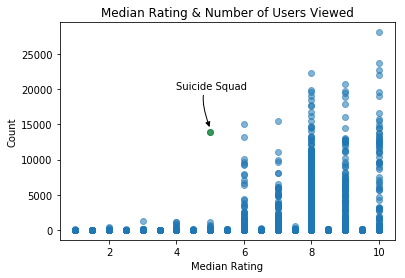

In [13]:
fig, ax = plt.subplots()

ax.scatter(userrattings0.groupby('movies')['ratings'].median(),
           userrattings0.groupby('movies')['ratings'].count(), alpha = 0.55)

dud = (userrattings0["movies"] == "suicide-squad-2016")

dud_y = most_watched[most_watched.index == "suicide-squad-2016"] + 400

ax.scatter(userrattings0.loc[dud].groupby('movies')['ratings'].median(),
           userrattings0.loc[dud].groupby('movies')['ratings'].count(), alpha = 0.55, color = "green")

ax.set_xlabel("Median Rating")
ax.set_ylabel("Count")
ax.set_title("Median Rating & Number of Users Viewed")

#adding annotation
plt.annotate('Suicide Squad', xy=(5, dud_y), xytext=(4, 20000), fontsize=10,
arrowprops=dict(arrowstyle= "-|>", connectionstyle= "angle3,angleA=5,angleB=110", facecolor='black')
)

plt.show(); 

Suicide Squad stands out as a popular, yet poorly reviewed movie. Why did so many people watch it given its low ratings?

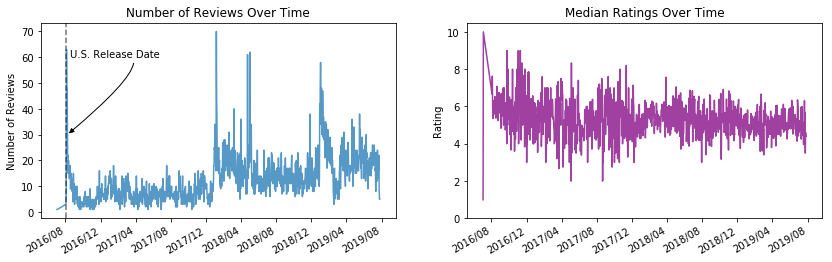

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))

## Number of Views Over Time
ax[0].plot(userrattings0[userrattings0["movies"] == "suicide-squad-2016"].groupby('date')['ratings'].count().index,
           userrattings0[userrattings0["movies"] == "suicide-squad-2016"].groupby('date')['ratings'].count(), alpha = 0.75) 

ax[0].axvline("2016/08/05", color='black', linestyle='dashed', linewidth=1.5, alpha = 0.55) #release date

## Mean Ratings Over Time
ax[1].plot(userrattings0[userrattings0["movies"] == "suicide-squad-2016"].groupby('date')['ratings'].mean().index,
           userrattings0[userrattings0["movies"] == "suicide-squad-2016"].groupby('date')['ratings'].mean(), 
        alpha = 0.75, color = "purple") 

#axis labels
ax[0].set_ylabel("Number of Reviews")
ax[0].set_title("Number of Reviews Over Time")

ax[1].set_ylabel("Rating")
ax[1].set_title("Median Ratings Over Time")
ax[1].set_ylim([0, 10.5])


#adding annotation
ax[0].annotate('U.S. Release Date', xy=("2016/08/08", 30), xytext=("2016/08/18", 60), fontsize=10,
arrowprops=dict(arrowstyle= "-|>", connectionstyle= "angle3,angleA=5,angleB=40", facecolor='black')
)

fig.autofmt_xdate() #rotating axis for legibility
ax[0].xaxis.set_major_formatter(DateFormatter('%Y/%m')) #displaying months only for legibility
ax[1].xaxis.set_major_formatter(DateFormatter('%Y/%m')) 
plt.show(); 

The data only deepens the mystery. There was a clear spike in the number of viewings shortly after the movie was released, which dropped almost immediately. Ratings quickly converged to +- 6 and have stayed there since -- yet the movie has spiked in views several times since. Though this might be explained by holidays (there is a spike around Christmas), it isn't clear why someone would spend their time watching a movie with a mediocre track record.

I plot another movie, Pulp Fiction, to try to make sense of these spikes. Pulp Fiction has been an acclaimed classic for a while now, and has a famous director. Due to its notoriety, we may expect the number of views over time to be smoother.

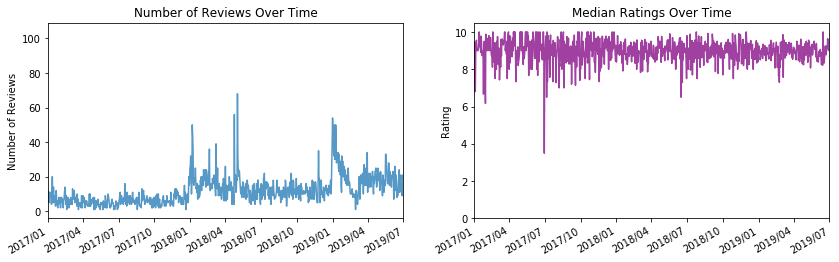

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))

## Number of Views Over Time
ax[0].plot(userrattings0[userrattings0["movies"] == "pulp-fiction"].groupby('date')['ratings'].count().index,
           userrattings0[userrattings0["movies"] == "pulp-fiction"].groupby('date')['ratings'].count(), alpha = 0.75) 

ax[0].axvline("2016/08/05", color='black', linestyle='dashed', linewidth=1.5, alpha = 0.55) #release date

## Mean Ratings Over Time
ax[1].plot(userrattings0[userrattings0["movies"] == "pulp-fiction"].groupby('date')['ratings'].mean().index,
           userrattings0[userrattings0["movies"] == "pulp-fiction"].groupby('date')['ratings'].mean(), 
        alpha = 0.75, color = "purple") 

#axis labels
ax[0].set_ylabel("Number of Reviews")
ax[0].set_title("Number of Reviews Over Time")

ax[1].set_ylabel("Rating")
ax[1].set_title("Median Ratings Over Time")
ax[1].set_ylim([0, 10.5])

ax[0].set_xlim(["2017/01/01", "2019/07/01"])
ax[1].set_xlim(["2017/01/01", "2019/07/01"])

fig.autofmt_xdate() #rotating axis for legibility
ax[0].xaxis.set_major_formatter(DateFormatter('%Y/%m')) #displaying months only for legibility
ax[1].xaxis.set_major_formatter(DateFormatter('%Y/%m')) 
plt.show(); 

It seems that 1) the trend lines for Pulp Fiction are indeed smoother, though clearly marked by holidays, and 2) there is somewhat weakening consensus around the movie's quality (there seems to be a slight downward trend from 10ish to 9 in average rating.

I can try expanding the analysis by adding more movie related data -- more specifically, movie genres.

In [15]:
movie_data = pd.read_csv(r"C:/Users/ia767/Documents/Coding/ON GITHUB/movie_data_clustering.csv", encoding='latin-1') 
movie_data.head()

,movie,date,actor1,actor2,actor3,director,genre1,genre2
0,coda-2013,NaN,NaN,NaN,NaN,NaN,animation,drama
1,brick,NaN,NaN,NaN,NaN,NaN,mystery,drama
2,dumplin,NaN,NaN,NaN,NaN,NaN,comedy,drama
3,grosse-pointe-blank,NaN,NaN,NaN,NaN,NaN,romance,comedy
4,wanted-2008,NaN,NaN,NaN,NaN,NaN,crime,thriller


In [16]:
big_db = movie_data[["movie", "genre1", "genre2"]].merge(userrattings0, left_on = "movie", right_on = "movies")
big_db.head()

,movie,genre1,genre2,dates,movies,ratings,date
0,coda-2013,animation,drama,2018-08-28,coda-2013,9,2018-08-28
1,brick,mystery,drama,2019-07-12,brick,8,2019-07-12
2,brick,mystery,drama,2019-06-13,brick,10,2019-06-13
3,brick,mystery,drama,2018-02-16,brick,4,2018-02-16
4,brick,mystery,drama,2018-10-26,brick,10,2018-10-26


Let's take a look at some of the genres:

In [17]:
big_db["genre1"].unique()

array(['animation', 'mystery', 'comedy', 'romance', 'crime', 'music',
       'thriller', 'horror', 'adventure', 'fantasy', 'drama', 'history',
       'war', 'action', 'science-fiction', 'family', 'documentary',
       'western', nan, 'tv-movie'], dtype=object)

What are some of the most popular genres?

In [21]:
main_genre = big_db.groupby("genre1")["movie"].count().head(4).index
big_db.groupby("genre1")["movie"].count().head()

genre1
action       464466
adventure    268772
animation    135392
comedy       338764
crime        137966
Name: movie, dtype: int64

In [42]:
color_dict = {"action": "#0000ff",
             "adventure": "#cd34b5",
             "animation":"#fa8775",
             "comedy":"#ffd700" }

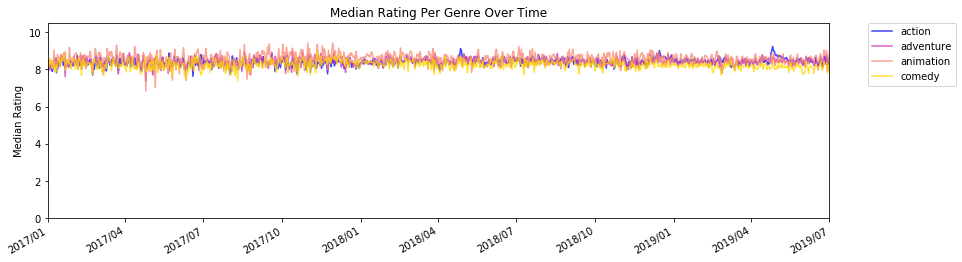

In [41]:
fig, ax = plt.subplots(figsize = (14, 4))

for i in range(0, len(main_genre)):
    ax.plot(big_db[big_db["genre1"] == main_genre[i]].groupby('date')['ratings'].mean().index,
           big_db[big_db["genre1"] == main_genre[i]].groupby('date')['ratings'].mean(), 
        alpha = 0.75, color = color_dict[main_genre[i]] ) 
    
#axis labels
ax.set_ylabel("Median Rating")
ax.set_title("Median Rating Per Genre Over Time")
ax.set_xlim(["2017/01/01", "2019/07/01"])
ax.set_ylim([0, 10.5])

#adding legend
plt.legend(main_genre, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.autofmt_xdate() #rotating axis for legibility
ax.xaxis.set_major_formatter(DateFormatter('%Y/%m')) #displaying months only for legibility
plt.show(); 

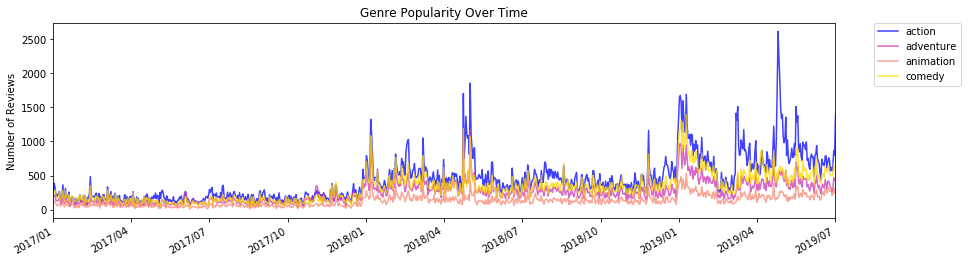

In [32]:
fig, ax = plt.subplots(figsize = (14, 4))

for i in range(0, len(main_genre)):
    ax.plot(big_db[big_db["genre1"] == main_genre[i]].groupby('date')['ratings'].count().index,
           big_db[big_db["genre1"] == main_genre[i]].groupby('date')['ratings'].count(), 
        alpha = 0.75, color = color_dict[main_genre[i]] ) 
    
#axis labels
ax.set_ylabel("Number of Reviews")
ax.set_title("Genre Popularity Over Time")
ax.set_xlim(["2017/01/01", "2019/07/01"])

#adding legend
plt.legend(main_genre, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.autofmt_xdate() #rotating axis for legibility
ax.xaxis.set_major_formatter(DateFormatter('%Y/%m')) #displaying months only for legibility
plt.show(); 

It appears that even though the mean ratings of genres stays consistent across time, the creation of strong movie franchises like The Avengers has helped fuel the popularity of action/comedy movies across time.

It would be interesting, as next steps, to verify that these peaks are seasonal and driven by said-franchises. It would also be worthwhile to look at smaller, indie movies as well as the change in popularity of cult classics.